In [1]:
import prop
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt



fluid1 = "REFPROP::R236ea"
fluid2 = "REFPROP::R236ea"

streams = pd.read_excel("streams.xlsx",index_col=0)
blocks  = pd.read_excel("blocks.xlsx" ,index_col=0)

T1 = 300
P1 = 0.3
G1 = 50
H1 = prop.t_p(T1,P1,fluid1)["H"]
S1 = prop.t_p(T1,P1,fluid1)["S"]
Q1 = prop.t_p(T1,P1,fluid1)["Q"]

T2 = 250
P2 = 5
G2 = 100
H2 = prop.t_p(T2,P2,fluid2)["H"]
S2 = prop.t_p(T2,P2,fluid2)["S"]
Q2 = prop.t_p(T2,P2,fluid2)["Q"]

streams.loc["IN-HEAT", "T":"Q"]  =  [T1,P1,H1,S1,G1,Q1]
streams.loc["REG-HEAT", "T":"Q"] =  [T2,P2,H2,S2,G2,Q2]


streams

,T,P,H,S,G,Q
IN-HEAT,300.0,0.3,673.189607,2.280709,50.0,1.0
HEAT-OUT,NaN,NaN,NaN,NaN,NaN,NaN
COND-PUMP,NaN,NaN,NaN,NaN,NaN,NaN
PUMP-REG,NaN,NaN,NaN,NaN,NaN,NaN
REG-HEAT,250.0,5.0,589.651369,1.982514,100.0,1.0
HEAT-TURB,NaN,NaN,NaN,NaN,NaN,NaN
TURB-REG,NaN,NaN,NaN,NaN,NaN,NaN
REG-COND,NaN,NaN,NaN,NaN,NaN,NaN


260.00000000000057 267.99729261651805
260.00000000000057 267.99729261651805


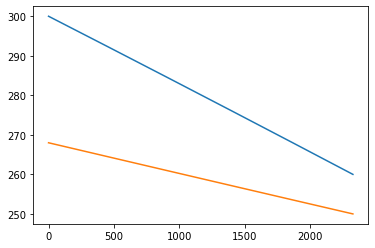

In [4]:
stream11 = "IN-HEAT"
stream21 = "REG-HEAT"
T12 = 260


#func
H11 = streams.at[stream11,"H"]
H21 = streams.at[stream21,"H"]
P1 = streams.at[stream11,"P"]
P2 = streams.at[stream21,"P"]
G1 = streams.at[stream11,"G"]
G2 = streams.at[stream21,"G"]


H12 = prop.t_p(T12,P1,fluid1)["H"]
s = 5
step = (H11-H12)/s
t1   = n.zeros(s+1)
t2   = n.zeros(s+1)
Q    = n.zeros(s+1)
h11 = H11
h21 = H21
for i in range(s+1):
    t1[i] = prop.h_p(h11,P1,fluid1)["T"]
    if i < s:
        h12 = h11-step
        dQ = G1*(h11-h12)
        h11 = h12
        Q[i+1] = Q[i]+dQ
for i in range(s+1):
    t2[s-i] = prop.h_p(h21,P2,fluid2)["T"]
    if i < s:
        h22 = h21+(Q[s-i]-Q[s-i-1])/G2
        h21 = h22
T12 = t1[s]
T22 = t2[0]
H12 = h11
H22 = h21
plt.plot(Q,t1,Q,t2)